# Testing for Trends - Lab

## Introduction

In this lab, you'll practice your knowledge of testing for stationarity.

## Objectives

You will be able to:

* Check and comment on the stationarity of time series data 
* Use rolling statistics as an initial check for stationarity 
* Use the Dickey-Fuller Test for performing statistical testing for time series stationarity

## Importing the data

Let's look at some new data. In this lab, We'll work by creating a time-series object in Python by using the popular [Air Passengers dataset](https://www.analyticsvidhya.com/wp-content/uploads/2016/02/AirPassengers.csv).

This dataset is stored as `passengers.csv`.

In [1]:
# Import necessary libraries
import pandas as pd
from pandas import Series
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm

Import `passengers.csv` and view the head.

In [42]:
# Read the dataset 'passengers.csv' and view the head
df = pd.read_csv('passengers.csv')
df.head()

# Month	#Passengers
# 0	1949-01-01	112
# 1	1949-02-01	118
# 2	1949-03-01	132
# 3	1949-04-01	129
# 4	1949-05-01	121

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


Change the `Month` column over to a `datetime` object and make sure it is set as the index.

In [43]:
# Set month column as a timeseries object, and make it the index
df.Month = pd.to_datetime(df.Month)

In [44]:
df.set_index('Month', inplace=True)

In [45]:
# check the head and the new index
df.head()
df.index

# DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
#                '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
#                '1949-09-01', '1949-10-01',
#                ...
#                '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
#                '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
#                '1960-11-01', '1960-12-01'],
#               dtype='datetime64[ns]', name='Month', length=144, freq=None)

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

Now that we have successfully created a TS object, we can use the `plot()` function in pandas to visually inspect this time-series.

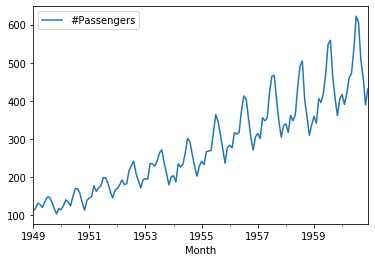

In [46]:
# Plot the time series data 
df.plot()

Wec can see that that there is an overall increasing trend in the data along with some seasonal variations. However, it might not always be possible to make such visual inferences. Let's reconfirm this here using both **rolling statistics** and the 
**Dickey-Fuller Test**.

## Rolling Statistics 

Use the `.rolling()` function to find the rolling mean and rolling std with a window of 12 months. Plot the original curve along with the rolling mean and standard error.

In [47]:
#Determine rolling statistics
rolmean = df.rolling(window=12, center=False).mean()
rolstd = df.rolling(window=12, center=False).std()

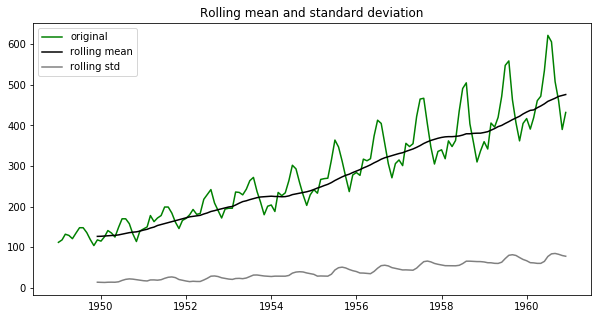

In [58]:
#Plot rolling statistics
fig = plt.figure(figsize=(10,5))
orig = plt.plot(df, color='green', label='original')
mean = plt.plot(rolmean, color='black', label='rolling mean')
std = plt.plot(rolstd, color='grey', label='rolling std')
plt.legend(loc='best')
plt.title('Rolling mean and standard deviation')
plt.show()

Though the variation in standard deviation is small, the mean is increasing with time and thus, this is not a stationary series. 

## Dickey-Fuller Test 

Use the Dickey-Fuller Test to verify your visual result.

In [59]:
from statsmodels.tsa.stattools import adfuller

#Perform Dickey-Fuller test:
print('Dickey Fuller Test Results:')
dtest = adfuller(df['#Passengers'])
# Extract and display test results in a user friendly manner
dout = pd.Series(dtest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key, value in dtest[4].items():
    dout['Critical Value (%s)'%key] = value
print(dout)

# Results of Dickey-Fuller Test:
# Test Statistic                   0.815369
# p-value                          0.991880
# #Lags Used                      13.000000
# Number of Observations Used    130.000000
# Critical Value (1%)             -3.481682
# Critical Value (5%)             -2.884042
# Critical Value (10%)            -2.578770
# dtype: float64

Dickey Fuller Test Results:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


## Level up - Optional

Repeat the previous steps for the NYSE monthly data , stored in "NYSE_monthly.csv".

In [281]:
# create function for TS col conversion

def dt_convert(data, col, idx=True, drop=True):
    
    data[col] = pd.to_datetime(data[col])
    
    if idx == True and drop == True:
        data.set_index(col, inplace=True, drop=True)
            
    else:
        data.set_index(col, inplace=True, drop=False)
        #display(data.info(), set_caption=('{%s}', data))
    return data.info()

In [282]:
# test conversion function:

df = pd.read_csv('NYSE_monthly.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 2 columns):
Month             72 non-null object
monthly_return    72 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.2+ KB


In [283]:
dt_convert(df, 'Month')

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 72 entries, 1961-01-01 to 1966-12-01
Data columns (total 1 columns):
monthly_return    72 non-null float64
dtypes: float64(1)
memory usage: 1.1 KB


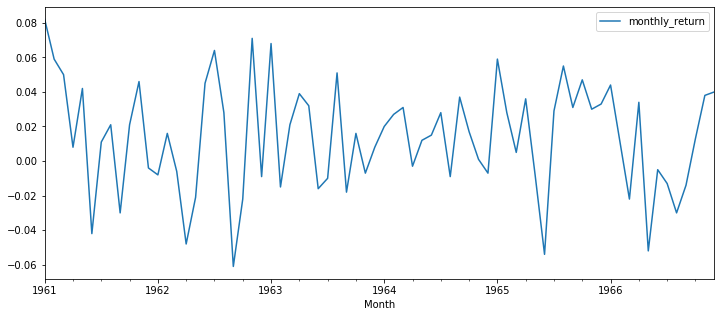

In [284]:
df.plot(figsize=(12,5))

In [285]:
# Create function for rolling stats plot

def roll_stats(data, win=12, center=False):

    #Determine rolling statistics
    rolmean = data.rolling(window=12, center=False).mean()
    rolstd = data.rolling(window=12, center=False).std()

    #Plot rolling statistics
    fig = plt.figure(figsize=(12,6))
    orig = plt.plot(data, color='green', label='original')
    mean = plt.plot(rolmean, color='black', label='rolling mean')
    std = plt.plot(rolstd, color='grey', label='rolling std')
    plt.legend(loc='best')
    plt.title('Rolling mean and standard deviation')
    plt.show()

# plot NYSE dataset
# roll_stats(df)

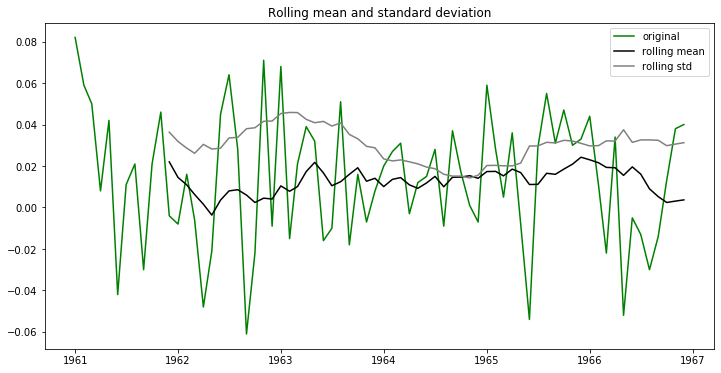

In [286]:
roll_stats(df)

In [287]:
# Create AdFuller function:

def dickey_fuller(data, col):
    
    from statsmodels.tsa.stattools import adfuller
    
    #Perform Dickey-Fuller test:
    print('Dickey Fuller Test Results:')
    dtest = adfuller(data[col])
    # Extract and display test results in a user friendly manner
    dout = pd.Series(dtest[0:4], index=['Test Statistic','p-value',
                                        '#Lags Used','Number of Observations Used'])
    for key, value in dtest[4].items():
        dout['Critical Value (%s)'%key] = value
    
    if dtest[0] < dtest[1]:
        print("Null hypothesis cannot be rejected.\nThe data is not stationary!")
    else:
        print("Null hypothesis is rejected.\nThe data is stationary!")
    
    return dout

# dickey_fuller(df, 'monthly_return')

In [288]:
dickey_fuller(df, 'monthly_return')

Dickey Fuller Test Results:
Null hypothesis cannot be rejected.
The data is not stationary!


Test Statistic                -7.895375e+00
p-value                        4.325126e-12
#Lags Used                     0.000000e+00
Number of Observations Used    7.100000e+01
Critical Value (1%)           -3.526005e+00
Critical Value (5%)           -2.903200e+00
Critical Value (10%)          -2.588995e+00
dtype: float64

In [289]:
# Combine functions above into one

def time_stats(data, idx, col):
    import pandas as pd
    from pandas import Series
    import numpy as np
    import matplotlib.pyplot as plt
    %matplotlib inline
    import statsmodels.api as sm

    dt_convert(data, idx)
    roll_stats(data)
    dickey_fuller(data, col)
    
    return display(dout)

# df = pd.read_csv('passengers.csv')
# df.head()

# time_stats(df, 'Month', col='#Passengers')

# df2 = pd.read_csv('NYSE_monthly.csv')
# df2.head()
# time_stats(df2, 'Month', col='monthly_return')

In [290]:
df = pd.read_csv('passengers.csv')

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
#Passengers    144 non-null int64
dtypes: int64(1)
memory usage: 2.2 KB


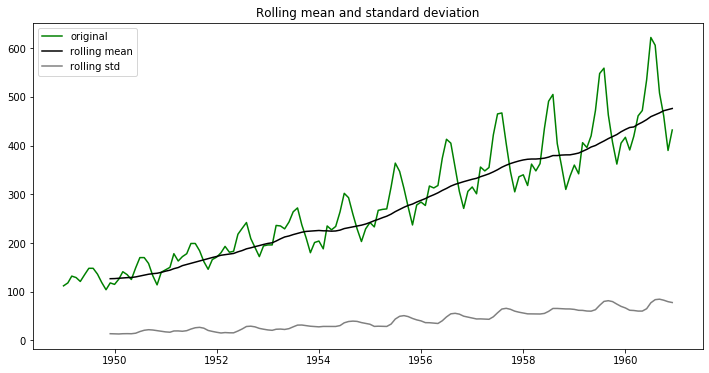

Dickey Fuller Test Results:
Null hypothesis cannot be rejected.
The data is not stationary!


Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64

In [291]:
time_stats(df, 'Month', col='#Passengers')

In [292]:
df2 = pd.read_csv('NYSE_monthly.csv')
df2.head()

,Month,monthly_return
0,1961-01,0.082
1,1961-02,0.059
2,1961-03,0.050
3,1961-04,0.008
4,1961-05,0.042


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 72 entries, 1961-01-01 to 1966-12-01
Data columns (total 1 columns):
monthly_return    72 non-null float64
dtypes: float64(1)
memory usage: 1.1 KB


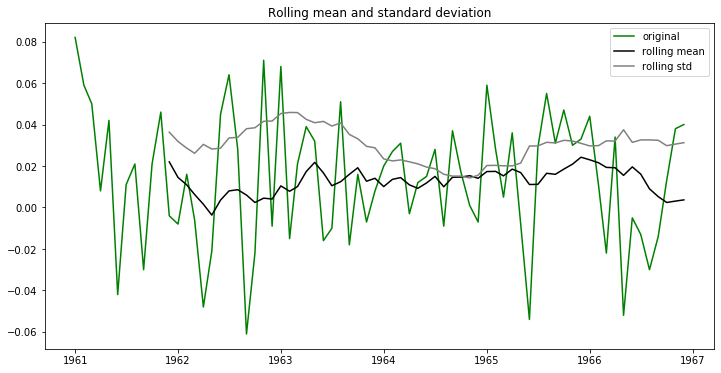

Dickey Fuller Test Results:
Null hypothesis cannot be rejected.
The data is not stationary!


Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64

In [293]:
time_stats(df2, 'Month', 'monthly_return')

## Summary

In this lab, you learned to check for the stationarity of a time-series object in Python. Next, we'll further explore stationarity and how to make sure to make time series stationary!